# **菊安酱和菜菜的python机器学习可视化**

## <font color='bule'>第2期 偏差图：12发散型包点图 & 13带标记的发散型棒棒糖图 

#### **菊安酱所使用的版本**：

In [1]:
import sys
import matplotlib as mlp
import seaborn as sns

print(sns.__version__)    #0.9.0
print(mlp.__version__)    #3.0.2

#Python版本
sys.version               #3.7.1

0.9.0
3.0.2


'3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]'

## <font color='bule'>12/50 发散型包点图 

发散型包点图与发散型条形图、发散型文本都非常的相似，可以说这个发散型包点图包含了条形图和文本图的两部分信息。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/%E5%8F%91%E6%95%A3%E5%9E%8B%E5%8C%85%E7%82%B9%E5%9B%BE.png' width=600>

- 横坐标：里程
- 纵坐标：汽车名称
- 颜色：大于0显示绿色，小于0显示红色

### 1. 导入绘图需要的包

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.认识绘制包点图的函数

前面我们有说过，包点图其实与发散型条形图和发散型本文非常相似，此外包点图也是散点图的一种变形    
从我们需要绘制的目标图形可以看出，包点图中包含了散点和文本   
那么相信大家也能够猜出来啦，我们绘制包点图的函数就是有散点图和文本图两部分组成的~~~    

#### **plt.scatter**
> 重要参数
>> x,y：绘制散点图的数据    
>> s：散点的大小   
>> c：散点的颜色   
>> marker：散点的形状（默认是圆形）  

#### **plt.text**
> 重要参数  
>> x,y：文本放置的位置坐标   
>> s：文本的内容   
>> horizontalalignment：水平对齐控制参数（center/left/right三种可选）   
>> verticalalignment：垂直对齐控制参数（'top', 'bottom', 'center', 'baseline', 'center_baseline'五种可选）  

### 3.绘制简单的散点图和文本图

In [3]:
data = np.random.randn(10)

In [4]:
data

array([ 0.19163645,  0.19471735,  0.65507569, -0.24717486, -1.14212509,
       -1.76939045, -0.01840805, -0.04049006, -0.43688224, -1.06910333])

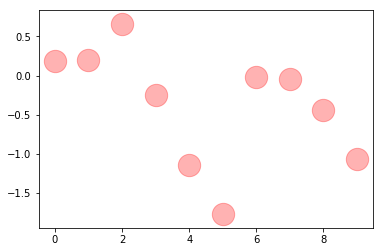

In [9]:
plt.scatter(range(10),data
            ,s=500
            ,c='r'
            ,alpha=0.3
           );

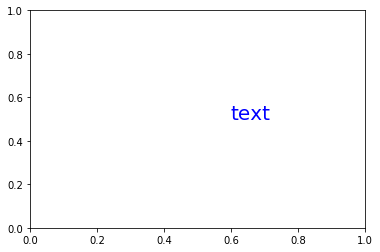

In [13]:
plt.text(0.6,0.5,'text'
         ,fontdict={'color':'b','size':20}
        );

【注意】:文本图一次只能填写一个位置的文本    
如果想要在每一个散点上进行标注，该怎么操作呢？那就只能上循环了    

In [14]:
zip(range(10),data)

In [15]:
#首先可以先将位置打包，可以用zip的方式
[*zip(range(10),data)]

[(0, 0.19163644732299992),
 (1, 0.1947173531130956),
 (2, 0.655075691294717),
 (3, -0.24717486400900768),
 (4, -1.1421250871674722),
 (5, -1.7693904538008456),
 (6, -0.018408047125200798),
 (7, -0.04049006068272915),
 (8, -0.4368822408492561),
 (9, -1.0691033339420797)]

In [16]:
#需要填写的文本是x保留一位小数，可以用round函数
round(data[0],1)

0.2

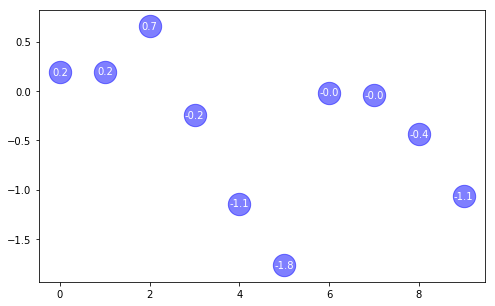

In [20]:
#绘制10个位置的文本图
plt.figure(figsize=(8,5))

plt.scatter(range(10),data,s=500,c='b',alpha=0.5)
for x,y in zip(range(10),data):
    plt.text(x,y,round(y,1),fontdict={'size':10,'color':'w'}
             ,horizontalalignment='center'    #这里的左对齐是指文本的左边与位置点对齐，右对齐同理
             ,verticalalignment='center'
            );

### 4.认识绘图数据集

In [21]:
#导入数据集
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [22]:
df.head()  

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [23]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb', 'fast', 'cars', 'carname'],
      dtype='object')

In [24]:
name = ['英里每加仑','气缸数量','排量','总马力','驱动轴比'
        ,'重量','1/4英里所用时间','引擎形状','变速器','前进档数'
        ,'化油器数量','用油是否高效','汽车','汽车名称']

#英里每加仑：是指每消耗一加仑的油能跑多少英里，数值越大说明汽车的性能越好，可能是能源利用率比较高，也可能是速度比较快  
#驱动轴比：是后轴的环形齿轮和驱动轴上的小齿轮的齿数的比较，通常是整数和小数
        # 3.9：1的比率意味着轴的齿圈上有3.9个齿用于驱动轴的小齿轮上的每个齿
#重量：这里的重量单位是磅/1000
#1/4英里所用时间：1/4英里差不过就是400米，也就是绕标准操场跑一圈所用的时间
#前进挡数：也就是除了倒挡之外还剩几个档
#化油器：指的是内燃机中用于混合空气和液体燃料的精细喷雾的装置

In [25]:
[*zip(df.columns,np.array(name))]

[('mpg', '英里每加仑'),
 ('cyl', '气缸数量'),
 ('disp', '排量'),
 ('hp', '总马力'),
 ('drat', '驱动轴比'),
 ('wt', '重量'),
 ('qsec', '1/4英里所用时间'),
 ('vs', '引擎形状'),
 ('am', '变速器'),
 ('gear', '前进档数'),
 ('carb', '化油器数量'),
 ('fast', '用油是否高效'),
 ('cars', '汽车'),
 ('carname', '汽车名称')]

绘制目标图形的横坐标是里程，纵坐标是汽车名称

In [26]:
#与里程相关的就是英里每加仑了
df['mpg'].values

array([4.58257569, 4.58257569, 4.77493455, 4.6260134 , 4.32434966,
       4.25440948, 3.78153408, 4.93963561, 4.77493455, 4.38178046,
       4.21900462, 4.04969135, 4.15932687, 3.89871774, 3.2249031 ,
       3.2249031 , 3.8340579 , 5.69209979, 5.5136195 , 5.82237065,
       4.63680925, 3.93700394, 3.89871774, 3.64691651, 4.38178046,
       5.22494019, 5.09901951, 5.5136195 , 3.97492138, 4.4384682 ,
       3.87298335, 4.6260134 ])

In [27]:
#汽车名称
df['carname'].values

array(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D',
       'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL',
       'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental',
       'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla',
       'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28',
       'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa',
       'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype=object)

#### 此处的数据处理与发散型条形图的处理方法是一样的

In [30]:
#提取出目标特征
x = df.loc[:,['mpg']]  #对于提取单列数据，如果在列名外加[]就会生成dataframe格式的数据，如果不加则生成series

#对数据进行z-score标准化处理，将生成的标准化数据增加到df中
df['mpg_z'] = (x - x.mean())/x.std()

#生成颜色标签
df['colors'] = ['green' if x>0 else 'red' for x in df['mpg_z']]

#根据标准化之后的数据，对整个数据集进行排序
df.sort_values('mpg_z',inplace=True)

#重置整个数据集的索引
#df.reset_index(inplace=True)
df.index = range(df.shape[0])

In [31]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


### 5.绘制发散型包点图

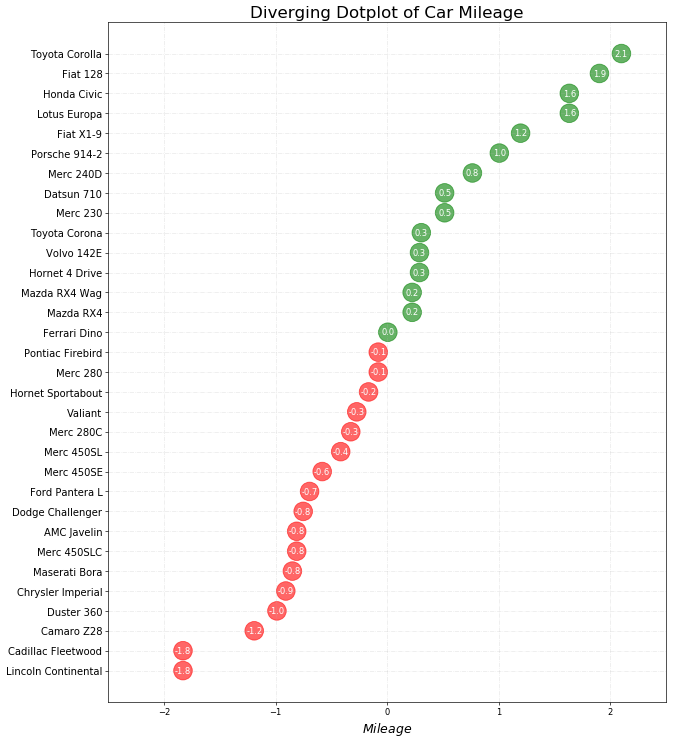

In [35]:
#创建画布并设定画布大小
plt.figure(figsize=(12,15),dpi=60)

#绘制散点图
plt.scatter(df.mpg_z,df.index,s=500,alpha=0.6,color=df.colors)

#添加文本
for x,y,text in zip(df.mpg_z,df.index,df.mpg_z):
    plt.text(x,y,round(text,1),fontdict={'color':'w','size':10}
             ,horizontalalignment='center'
             ,verticalalignment='center')

#添加装饰
plt.title('Diverging Dotplot of Car Mileage',fontsize=20)
plt.xlabel('$Mileage$',fontsize=15)
plt.yticks(df.index,df.carname,fontsize=12)
plt.xlim(-2.5,2.5)
plt.grid(linestyle='-.',alpha=.3);

发散型包点图到这里基本上就已经完成了    
与目标图形对比的话，会发现目标图形**弱化了图形的边框**    
接下来我们就一起来看如何对图形的边框进行相关操作   

### matplotlib中的图像都可以分为画布（figure）和子图（Axes）
> 画布：相当于是一张绘画的白纸，没有画布图像则无法显示   
> 子图：除去画布之外，一切绘制图形的对象都包含在子图中（如：axis/title/label等）

在pyplot模块中，许多函数都是对当前的Figure或Axes对象进行处理，比如说：plt.plot()实际上会通过plt.gca()获得当前的Axes对象ax，然后再调用ax.plot()方法实现真正的绘图。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/fig%26axes.png" align="center" width=400/>

#### 方法一：直接使用命令式plt来进行修饰图形   
> 如果我们想要去掉或者弱化图形的边框的话，我们首先需要先获取子图Axes,然后再对子图中的边框进行操作    

> 当前的图表和子图可以使用plt.gcf()和plt.gca()获得，分别表示Get Current Figure和Get Current Axes    

> 在matplotlib的图中，默认有四个轴，两个横轴和两个竖轴，可以用spines获取图像的轴，总共有四个轴top、bottom、left和right，可以用set_color来设置轴的颜色，用set_alpha来设置轴的色彩饱和度

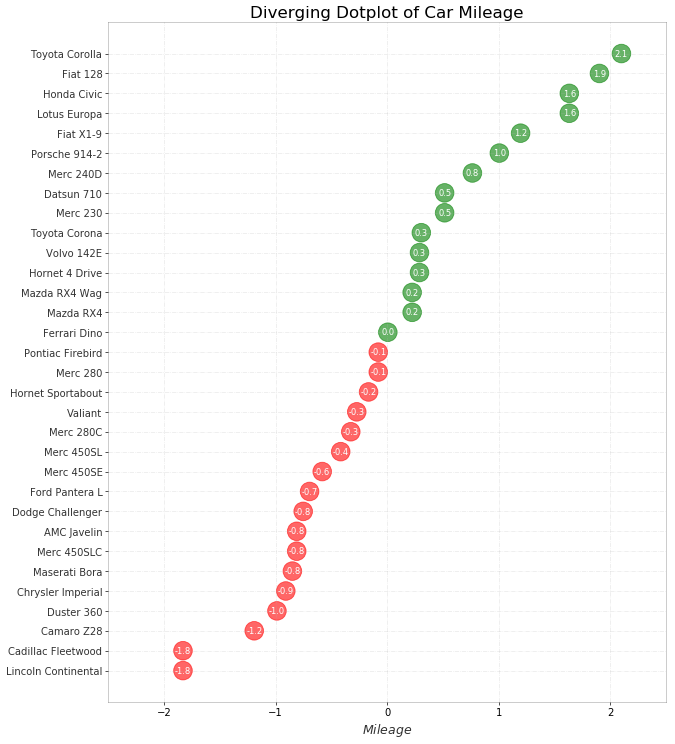

In [42]:
#创建画布并设定画布大小
plt.figure(figsize=(12,15),dpi=60
           #,facecolor='lightblue'
          )

#绘制散点图
plt.scatter(df.mpg_z,df.index,s=500,alpha=0.6,color=df.colors)
#添加文本
for x,y,text in zip(df.mpg_z,df.index,df.mpg_z):
    plt.text(x,y,round(text,1),fontdict={'color':'w','size':10}
             ,horizontalalignment='center'
             ,verticalalignment='center')
#轴的处理过程    
plt.gca().spines['right'].set_alpha(.3)
plt.gca().spines['left'].set_alpha(.3)
plt.gca().spines['bottom'].set_alpha(.3)
plt.gca().spines['top'].set_alpha(.3)

#添加装饰
plt.title('Diverging Dotplot of Car Mileage',fontsize=20)
plt.xlabel('$Mileage$',fontsize=15,alpha=.8)
plt.xticks(fontsize=12)
plt.yticks(df.index,df.carname,fontsize=12,alpha=.8)
plt.xlim(-2.5,2.5)
plt.grid(linestyle='-.',alpha=.3);

#### 方法二：

<font color='bule'>**把画布和Axes对象分开来操作的话，可以使用fig, ax = plt.subplots()**  
    
当画布和子图分开来操作的时候，如果要对轴进行弱化处理的话，可以直接用ax.spines进行设定，无需再获取当前子图

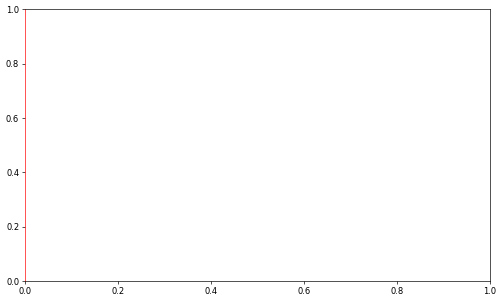

In [49]:
fig, ax = plt.subplots(figsize=(10,6)
                       #,facecolor="white"
                       #,facecolor="lightblue"
                       ,dpi = 60)

ax.spines['left'].set_color('red')
# ax.spines['right'].set_color('blue')
# ax.spines['bottom'].set_color('None')
# ax.spines['top'].set_alpha(.6)

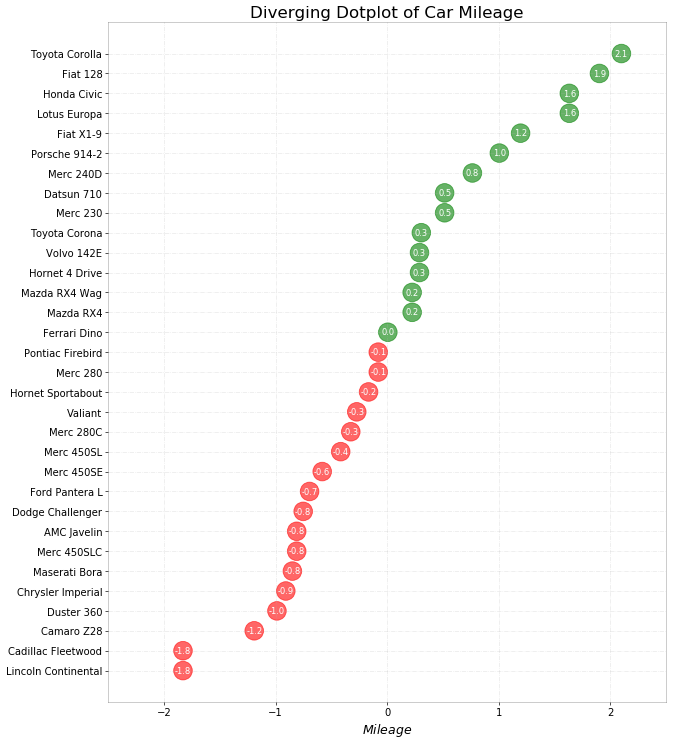

In [50]:
#创建画布并设定画布大小
fig, ax = plt.subplots(figsize=(12,15)
                       ,facecolor="white"
                       #,facecolor="lightblue"
                       ,dpi = 60)
#绘制散点图
plt.scatter(df.mpg_z,df.index,s=500,alpha=0.6,color=df.colors)
#添加文本
for x,y,text in zip(df.mpg_z,df.index,df.mpg_z):
    plt.text(x,y,round(text,1),fontdict={'color':'w','size':10}
             ,horizontalalignment='center'
             ,verticalalignment='center')

#虚化图形边框
ax.spines['right'].set_alpha(.3)
ax.spines['left'].set_alpha(.3)
ax.spines['bottom'].set_alpha(.3)
ax.spines['top'].set_alpha(.3)

#添加装饰
plt.title('Diverging Dotplot of Car Mileage',fontsize=20)
plt.xlabel('$Mileage$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(df.index,df.carname,fontsize=12)
plt.xlim(-2.5,2.5)
plt.grid(linestyle='-.',alpha=.3);

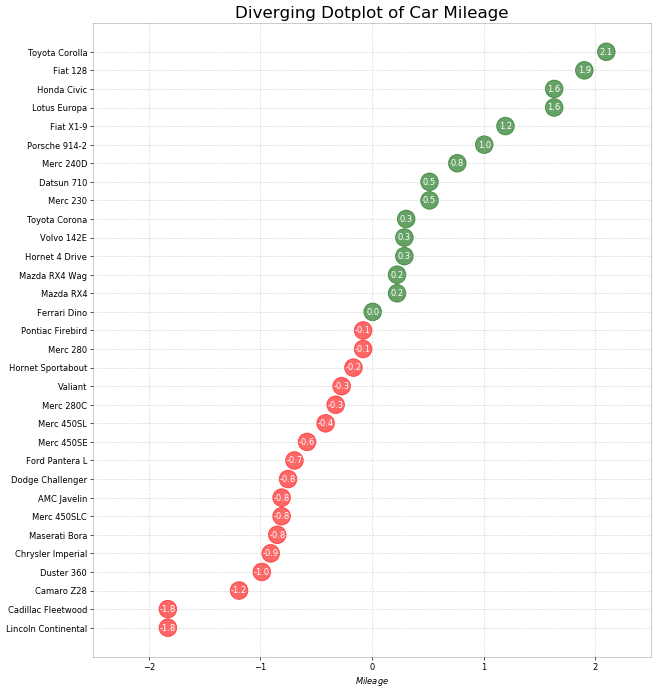

In [51]:
#源代码
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv") #导入数据集
x = df.loc[:, ['mpg']] #提取目标变量
df['mpg_z'] = (x - x.mean())/x.std() #对目标变量进行z-score标准化处理，均值为0，标准差为1
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']] #生成颜色标签列
df.sort_values('mpg_z', inplace=True) #根据标准化之后的数据对整个数据集进行排序
df.reset_index(inplace=True) #重置索引

# Draw plot
plt.figure(figsize=(12,14), dpi= 60)  #创建画布并设置画布大小
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors) #绘制散点图
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):   #添加文本标签
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars) #修改y轴刻度标签
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20}) #添加标题并设定标题字体大小
plt.xlabel('$Mileage$')  #添加x轴标签
plt.grid(linestyle='--', alpha=0.5) #配置网格线
plt.xlim(-2.5, 2.5) #设定x轴最大最小值
plt.show() #本地显示

### 6.图像解读

## <font color='bule'>13/50 带标记的发散型棒棒糖图

带标记的棒棒糖图可以强调所要传达的信息点，也可以在表中给出推理结果，并且将这种差异化进行展示。这是一种非常灵活的可视化方式。

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/%E5%B8%A6%E6%A0%87%E8%AE%B0%E7%9A%84%E5%8F%91%E6%95%A3%E5%9E%8B%E6%A3%92%E6%A3%92%E7%B3%96%E5%9B%BE.png' width=700>

### 1.导入绘图的包

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.patches as patches #导入补丁库

### 2. 认识绘制发散型棒棒糖图的函数
从目标图形可以看出，棒棒糖图其实就是条形图和散点图的结合

#### **plt.hlines**
> 重要参数   
>> y：绘图的y轴数据   
>> xmin/xmax：条形图的起始点和终止点   
>> colors：条形的颜色   

#### **plt.scatter**
> 重要参数
>> x,y：绘制散点图的数据    
>> s：散点的大小   
>> c：散点的颜色   
>> marker：散点的形状（默认是圆形）  

### 3.绘制简单的棒棒糖图

In [53]:
#随机生成10个数据
X = np.random.randn(10)

In [54]:
X

array([ 0.8464092 , -0.18629859, -0.51121228, -0.74437095,  1.68174177,
       -0.23313497, -1.35395916, -0.04450313,  0.0892327 , -0.66532515])

In [55]:
X.sort()

In [56]:
X

array([-1.35395916, -0.74437095, -0.66532515, -0.51121228, -0.23313497,
       -0.18629859, -0.04450313,  0.0892327 ,  0.8464092 ,  1.68174177])

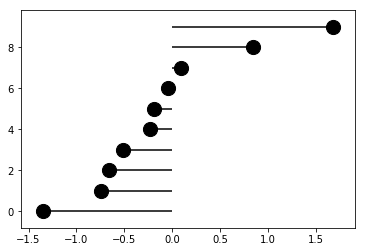

In [57]:
plt.hlines(y=range(10),xmin=0,xmax=X)
plt.scatter(X,range(10),s=200,c='k');

### 3.认识绘图的数据集并做简单数据处理

In [58]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [59]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [60]:
df.shape

(32, 14)

In [61]:
name = ['英里每加仑','气缸数量','排量','总马力','驱动轴比'
        ,'重量','1/4英里所用时间','引擎形状','变速器','前进档数'
        ,'化油器数量','是否快速','汽车','汽车名称']

#英里每加仑：是指每消耗一加仑的油能跑多少英里，数值越大说明汽车的性能越好，可能是能源利用率比较高，也可能是速度比较快  
#驱动轴比：是后轴的环形齿轮和驱动轴上的小齿轮的齿数的比较，通常是整数和小数
        # 3.9：1的比率意味着轴的齿圈上有3.9个齿用于驱动轴的小齿轮上的每个齿
#重量：这里的重量单位是磅/1000
#1/4英里所用时间：1/4英里差不过就是400米，也就是绕标准操场跑一圈所用的时间
#前进挡数：也就是除了倒挡之外还剩几个档
#化油器：指的是内燃机中用于混合空气和液体燃料的精细喷雾的装置

In [62]:
[*zip(df.columns,np.array(name))]

[('mpg', '英里每加仑'),
 ('cyl', '气缸数量'),
 ('disp', '排量'),
 ('hp', '总马力'),
 ('drat', '驱动轴比'),
 ('wt', '重量'),
 ('qsec', '1/4英里所用时间'),
 ('vs', '引擎形状'),
 ('am', '变速器'),
 ('gear', '前进档数'),
 ('carb', '化油器数量'),
 ('fast', '是否快速'),
 ('cars', '汽车'),
 ('carname', '汽车名称')]

#### 数据处理(这一部分与发散型条形图的处理方式相同)

In [63]:
#提取目标特征
x = df.loc[:, ['mpg']]

#对目标数据进行z-score标准化
df['mpg_z'] = (x - x.mean())/x.std()

#根据标准化之后的目标数据，对整个数据集进行排序
df.sort_values('mpg_z', inplace=True)

#重置排序之后的索引
df.reset_index(inplace=True)

#先设定颜色全部为黑色,也可以设置为 'k'
df['colors'] = 'black'

In [64]:
df.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,black
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,black
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,black
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,black
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,black


### 4.绘制发散型棒棒糖图

#### 4.1 绘制基本的发散型棒棒糖图

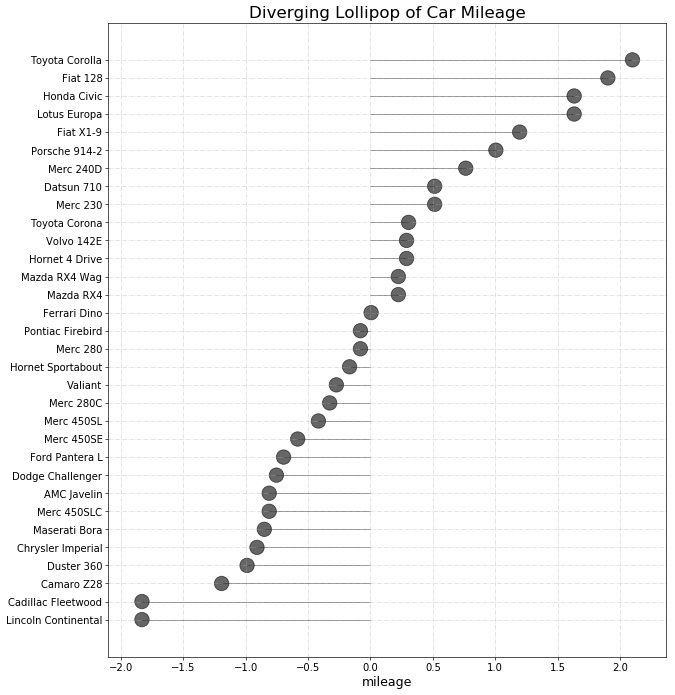

In [68]:
#创建画布并设定画布大小
plt.figure(figsize=(12,14), dpi= 60)

#绘制棒棒糖图
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors,s=300, alpha=0.6)

#添加装饰
plt.title('Diverging Lollipop of Car Mileage', fontdict={'size':20})#也可以写fontsize = 20来设定字体大小
plt.xlabel('mileage',fontsize=15)
plt.yticks(df.index, df.carname,fontsize=12)
plt.xticks(fontsize=12)
plt.grid(linestyle='-.',alpha=.5);

到这里，发散型棒棒糖图基本上已经画出来啦~~~    
但是……

这个图中并没有什么强调的信息    
所以接下来，我们要添加强调信息的元素    

####  4.2 假如我们想要强调其中的某一种车（以‘Fiat X1-9’为例，改变它的颜色和散点尺寸）

In [70]:
#首先改变这款车的颜色
df.loc[df.cars=='Fiat X1-9','colors'] = 'orange'

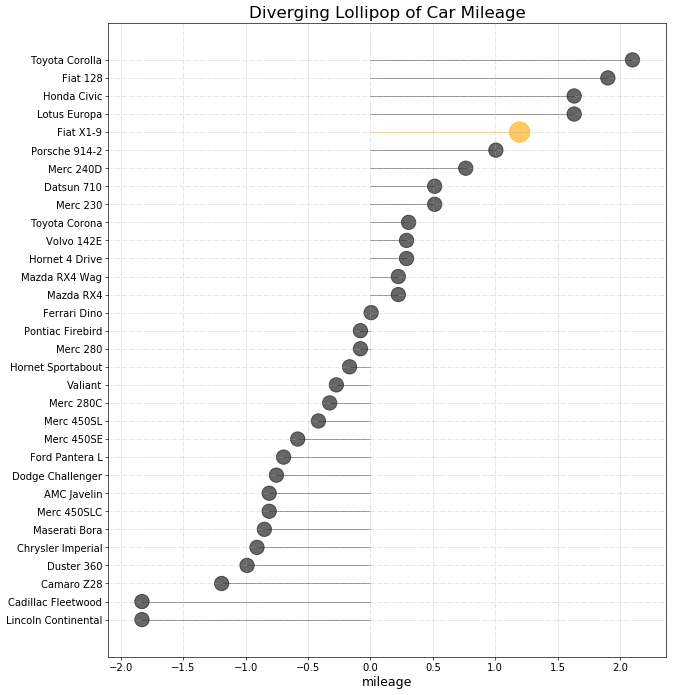

In [77]:
#创建画布并设定画布大小
plt.figure(figsize=(12,14), dpi= 60)

#绘制棒棒糖图
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, alpha=0.6
            #,s=300
            ,s = [600 if i=='Fiat X1-9' else 300 for i in df.cars]) #增大'Fiat X1-9'这款车的散点的大小

#添加装饰
plt.title('Diverging Lollipop of Car Mileage', fontdict={'size':20})
plt.xlabel('mileage',fontsize=15)
plt.yticks(df.index, df.carname,fontsize=12)
plt.xticks(fontsize=12)
plt.grid(linestyle='-.',alpha=.5);

#### 4.3 强调最大和最小的那两部分数据  
也就是目标图中红色和绿色填充的两个方框    
绘制矩形对象所使用的模块是patches，这个模块是“补丁”的意思，我们可以使用这个模块中的函数创造各种几何对象   

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/patches.png' width=400>

Matplotlib官网上对于patches有详细的介绍：https://matplotlib.org/api/patches_api.html

这里我们就看如何添加矩形补丁在子图上

#### **patches.Rectangle**
> 重要参数   
>> xy：补丁左下角的位置坐标   
>> width：补丁的宽度   
>> height：补丁的高度   
>> angle：旋转的角度(逆时针旋转)   
>> fill：是否填充

>> facecolor：补丁内部的颜色   
>> edgecolor：补丁边框的颜色

In [89]:
#导入补丁库
import matplotlib.patches as patches

添加补丁方法一：

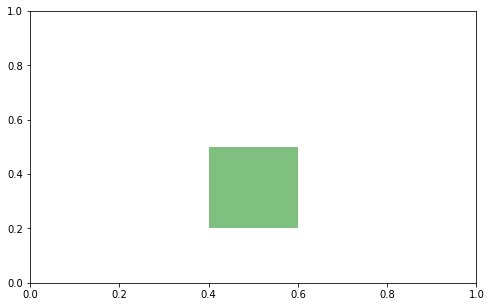

In [102]:
#创建画布和子图
fig,ax = plt.subplots(figsize=(8,5))

#创建补丁
p = patches.Rectangle((.4,.2),width=.2,height=.3
                      #,fill=False
                      ,facecolor='g'
                      #,edgecolor='r'
                      ,alpha=.5
                      #,angle=60
                     )
#在子图上添加补丁
ax.add_patch(p);

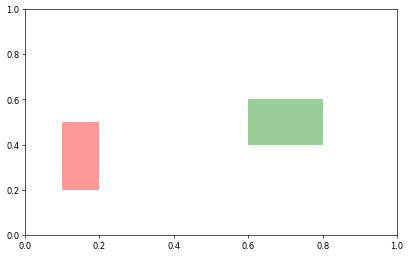

In [103]:
#创建画布并设定画布大小
plt.figure(figsize=(8,5), dpi= 60)

#创建补丁
p1 = patches.Rectangle((.1,.2),width=.1,height=.3,facecolor='r',alpha=.4)
p2 = patches.Rectangle((.6,.4),width=.2,height=.2,facecolor='g',alpha=.4)

#将补丁添加到子图上
plt.gca().add_patch(p1)
plt.gca().add_patch(p2);

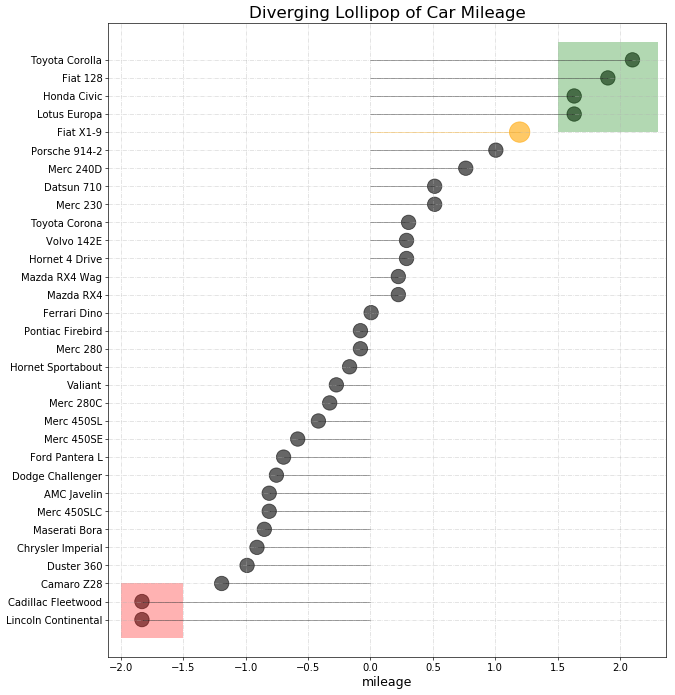

In [104]:
#创建画布并设定画布大小
plt.figure(figsize=(12,14), dpi= 60)

#绘制棒棒糖图
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, alpha=0.6
            #,s=300
            ,s = [600 if i=='Fiat X1-9' else 300 for i in df.cars]) #增大'Fiat X1-9'这款车的散点的大小

#创建矩形补丁
p1 = patches.Rectangle((1.5,27),width=.8,height=5,facecolor='g',alpha=.3)
p2 = patches.Rectangle((-2.0,-1),width=.5,height=3,facecolor='r',alpha=.3)

#将补丁添加到子图上
plt.gca().add_patch(p1)
plt.gca().add_patch(p2);

#添加装饰
plt.title('Diverging Lollipop of Car Mileage', fontdict={'size':20})
plt.xlabel('mileage',fontsize=15)
plt.yticks(df.index, df.carname,fontsize=12)
plt.xticks(fontsize=12)
plt.grid(linestyle='-.',alpha=.5);

#### 4.4 强调同款车型的信息

**plt.annotate**   
函数功能：添加注释
> 重要参数   
>> s：注释的文本内容   
>> xy：注释的起始位置   
>> xytext：文本的起始位置    
>> xycoords：xy坐标系(默认使用被注释对象的坐标轴，即xycoords='data')    
>> arrowprops: 用来设置箭头   
>> facecolor: 设置箭头的颜色   
>> headlength: 箭头的头的长度   
>> headwidth: 箭头的宽度   
>> width: 箭身的宽度   

关于annotate相关参考资料：https://matplotlib.org/tutorials/text/annotations.html?highlight=boxstyle

In [119]:
plt.annotate?

Signature: plt.annotate(s, xy, *args, **kwargs)
Docstring:
Annotate the point *xy* with text *s*.

In the simplest form, the text is placed at *xy*.

Optionally, the text can be displayed in another position *xytext*.
An arrow pointing from the text to the annotated point *xy* can then
be added by defining *arrowprops*.

Parameters
----------
s : str
    The text of the annotation.

xy : (float, float)
    The point *(x,y)* to annotate.

xytext : (float, float), optional
    The position *(x,y)* to place the text at.
    If *None*, defaults to *xy*.

xycoords : str, `.Artist`, `.Transform`, callable or tuple, optional

    The coordinate system that *xy* is given in. The following types
    of values are supported:

    - One of the following strings:

      =================   =============================================
      Value               Description
      =================   =============================================
      'figure points'     Points from the lower left of

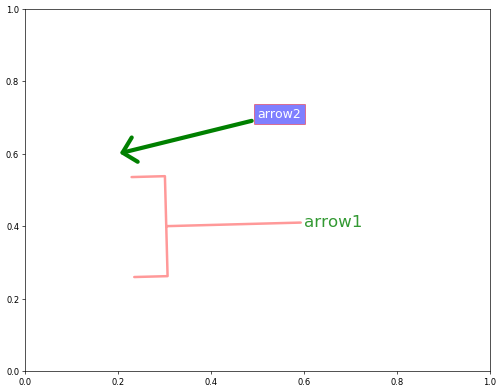

In [137]:
plt.figure(figsize=(10,8),dpi=60)

plt.annotate('arrow1', xy=(.3, .4), xytext=(.6, .4), xycoords='data', color='g',fontsize=20,alpha=.8,
            arrowprops=dict(arrowstyle='-[, widthB=3, lengthB=2', lw=3, color='r',alpha=.4));

plt.annotate('arrow2',xy=(.2,.6),xytext=(.5,.7),color='w',fontsize=15,
             bbox = dict(boxstyle='square', fc='b',ec='r',alpha=.5),
             arrowprops = dict(arrowstyle='->,head_length=1,head_width=1',lw=5,color='g'));

#### 常用的arrowstyle有：

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/arrowstyle.png' width=700>

#### 常用的boxstyle有circle/darrow/larrow/rarrow/round/round4/roundtooth/sawtooth/square  

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week2%20deviation/boxstyle.png' width=500>

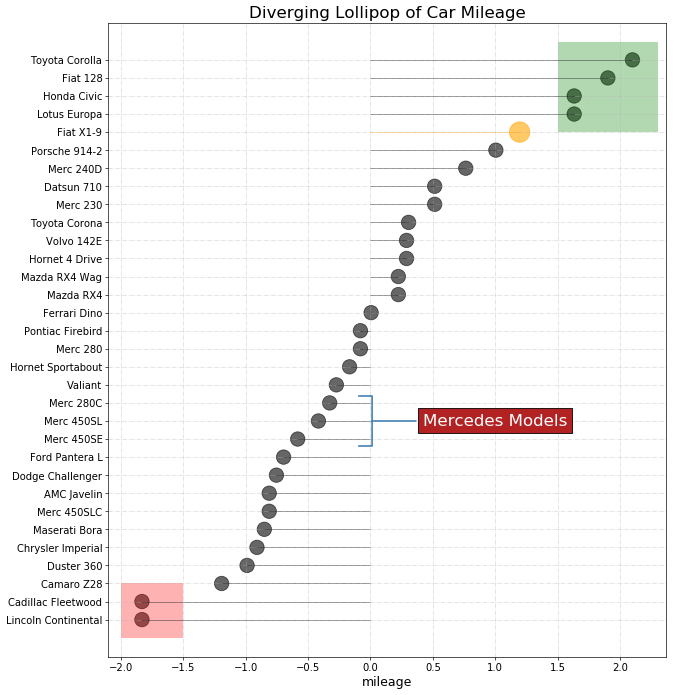

In [138]:
#创建画布并设定画布大小
plt.figure(figsize=(12,14), dpi= 60)

#绘制棒棒糖图
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, alpha=0.6
            #,s=300
            ,s = [600 if i=='Fiat X1-9' else 300 for i in df.cars]) #增大'Fiat X1-9'这款车的散点的大小

#创建矩形补丁
p1 = patches.Rectangle((1.5,27),width=.8,height=5,facecolor='g',alpha=.3)
p2 = patches.Rectangle((-2.0,-1),width=.5,height=3,facecolor='r',alpha=.3)

#将补丁添加到子图上
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

#添加注释
plt.annotate('Mercedes Models',xy=(0,11),xytext=(1,11),xycoords='data',
             color='w',fontsize=20,ha='center',va='center',
             bbox = dict(boxstyle='square', fc='firebrick'),#firebrick指的是砖红色
             arrowprops = dict(arrowstyle='-[, widthB=1.5, lengthB=.8',lw=2,color='steelblue'))

#添加装饰
plt.title('Diverging Lollipop of Car Mileage', fontdict={'size':20})
plt.xlabel('mileage',fontsize=15)
plt.yticks(df.index, df.carname,fontsize=12)
plt.xticks(fontsize=12)
plt.grid(linestyle='-.',alpha=.5);

到这里，我们就把目标图形画出来啦~~~

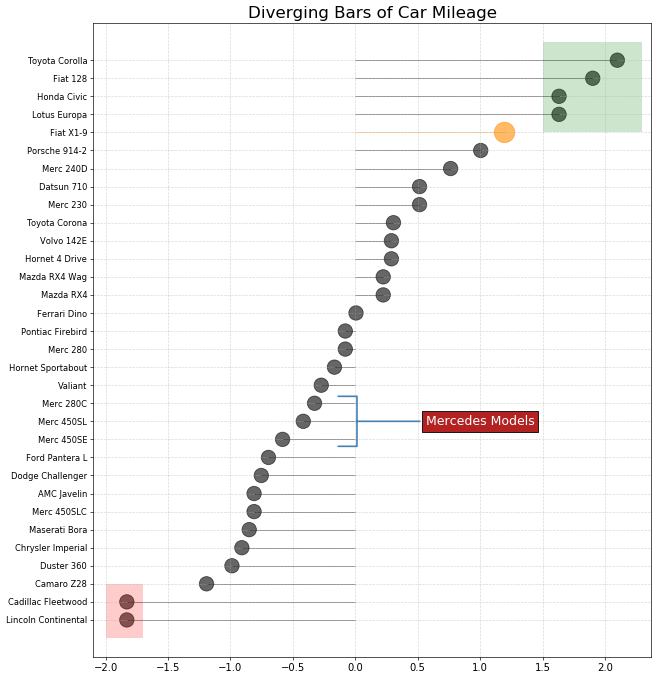

In [188]:
#源代码
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)


# Draw plot
import matplotlib.patches as patches 

plt.figure(figsize=(12,14), dpi= 60)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### 5.图形解读